# Ideal number of equivalent sources in order to fit a magnetic data by an equivalent layer

In [1]:
# Import all required modules
import sys, time, scipy, numpy
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection

In [2]:
# Write the main path for using the codes folder
mypath = sys.path.append('//home/delimar/Documents/sources/')

In [3]:
# Define number of points and data shape
nx, ny = 50, 50
shape = (nx, ny)

In [4]:
# Importing the grid creation module
from codes import grids

In [5]:
# Creating a regular grid
area = (-5000., 5000., -5000., 5000.)
xo, yo, zo = grids.regular_grid(area, shape, -150.)

In [6]:
# Directions
incf, decf, incs, decs = 5., -35., 0., 30.

In [7]:
# Define the model
dike1 = [-800., 700., -100., 2900., 200., 3000.]
dike2 = [-2200., 1100., -3500., -500., 200., 3000.]
dike3 = [-2000., 2000., -3500., -3500., 3000., 8000.]

In [8]:
# Import the total field module
from codes import prism, statistical

In [9]:
# Total field anomaly calculation
tf = prism.prism_tf(xo, yo, zo, dike1, 1., incf, decf, 45.) + \
    prism.prism_tf(xo, yo, zo, dike2, 1., incf, decf, 45.) + \
    prism.prism_tf(xo, yo, zo, dike3, 1., incf, decf, incs, decs)

In [10]:
# Analyzies
print 'Total field anomaly:'
_ = statistical.analysis(tf, 'nT')

Total field anomaly:
Minimum:    -270.8368 nT
Maximum:    245.9775 nT
Mean value: -10.3101 nT
Variation:  516.8143 nT


In [11]:
# Define the color scale value
tfmin = numpy.around(tf.min(), decimals = 1)
tfmax = numpy.around(tf.max(), decimals = 1)

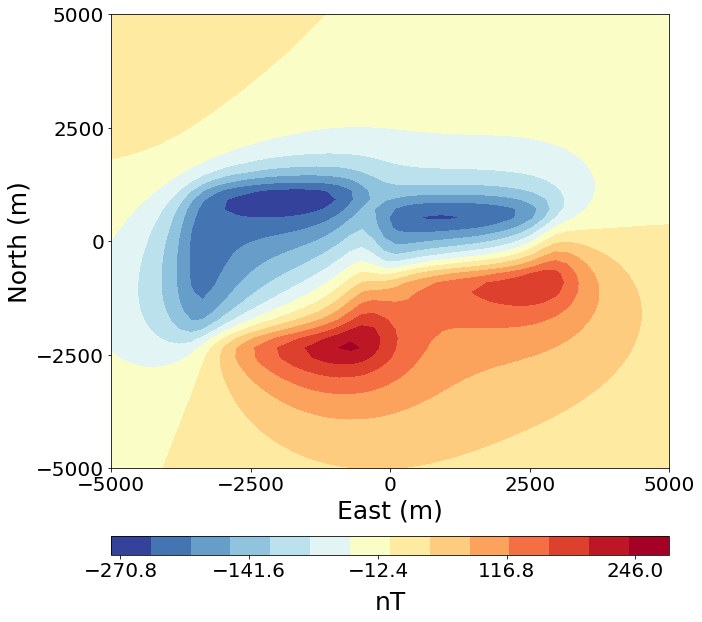

In [12]:
# Plotting the contour map
pyplot.figure(figsize=(10,10))
cs1 = pyplot.contourf(yo.reshape(shape), xo.reshape(shape), tf.reshape(shape), 
                15, vmin = tfmin, vmax = tfmax, cmap = pyplot.cm.RdYlBu_r, )
cb = pyplot.colorbar(cs1, shrink = 1., aspect = 30, fraction = 0.04, orientation = 'horizontal', pad = 0.125)
cb.set_ticks(numpy.linspace(tfmin, tfmax, 5))
cb.set_clim(tfmin, tfmax)
cb.set_label('nT', fontsize = 25, labelpad = 10)
cb.ax.tick_params(labelsize = 20)
pyplot.xlabel('East (m)', fontsize = 25, labelpad = 5)
pyplot.ylabel('North (m)', fontsize = 25, labelpad = 5)
pyplot.xticks(numpy.linspace(yo.min(), yo.max(), 5), fontsize = 20)
pyplot.yticks(numpy.linspace(xo.min(), xo.max(), 5), fontsize = 20)
#pyplot.legend(loc = 'upper left', fontsize = 'x-large')
#pyplot.savefig('figs/test-converg-01.png', dpi = 300, bbox_inches = 'tight', transparent = True)
#pyplot.savefig('figs/test-converg-01.pdf', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.show()

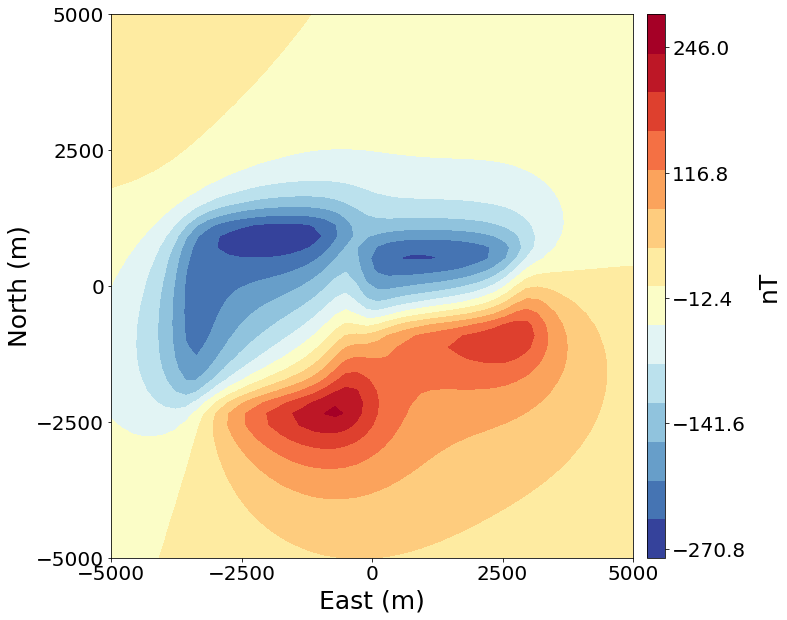

In [13]:
# Plotting the contour map
pyplot.figure(figsize=(10,10))
cs1 = pyplot.contourf(yo.reshape(shape), xo.reshape(shape), tf.reshape(shape), 
                15, vmin = tfmin, vmax = tfmax, cmap = pyplot.cm.RdYlBu_r, )
cb = pyplot.colorbar(cs1, shrink = 1., aspect = 30, fraction = 0.04, orientation = 'vertical', pad = 0.025)
cb.set_ticks(numpy.linspace(tfmin, tfmax, 5))
cb.set_clim(tfmin, tfmax)
cb.set_label('nT', fontsize = 25, labelpad = 10)
cb.ax.tick_params(labelsize = 20)
pyplot.xlabel('East (m)', fontsize = 25, labelpad = 5)
pyplot.ylabel('North (m)', fontsize = 25, labelpad = 5)
pyplot.xticks(numpy.linspace(yo.min(), yo.max(), 5), fontsize = 20)
pyplot.yticks(numpy.linspace(xo.min(), xo.max(), 5), fontsize = 20)
#pyplot.legend(loc = 'upper left', fontsize = 'x-large')
#pyplot.savefig('figs/test-converg-01(side).png', dpi = 300, bbox_inches = 'tight', transparent = True)
#pyplot.savefig('figs/test-converg-01(side).pdf', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.show()

In [14]:
# Import the equivalent layer module
from codes import equivalentlayer

In [15]:
# Define the equivalent layer
#shapex, shapey = grids.regular_grid((5, 50, 5, 50), (10, 10))
ds = 5
shapes = numpy.arange(5,  50 + ds, ds)
area_layer = (-4500., 4500., -4500., 4500.)
level = 0.5*(dike2[5] + dike2[4])

In [16]:
# Allocating both values
#shapes = numpy.vstack((shapex, shapey)).T

In [17]:
# Input data and the zero array for differences
data = [xo, yo, zo, tf]

In [18]:
# Compute the convergenc test
error = numpy.empty_like(shapes)
inicial = time.time()
for k in range(shapes.size):
    camada = equivalentlayer.layer(area_layer, (shapes[k], shapes[k]), level)
    _, fitted = equivalentlayer.fit_layer_mag(data, shape, camada, (shapes[k], shapes[k]), 0.0001, incf, decf, incs, decs)
    error[k] = numpy.dot((tf-fitted), (tf-fitted).T)
    final = time.time()
print 'Computational time (in seconds): %.3f' % (final - inicial )

Computational time (in seconds): 27.332


In [19]:
diff = 1.e-5*error

In [20]:
from scipy import interpolate
res = interpolate.interp1d(shapes, diff, kind = 'cubic')

In [21]:
S = numpy.linspace(shapes.min(), shapes.max(), 500)
E = res(S)

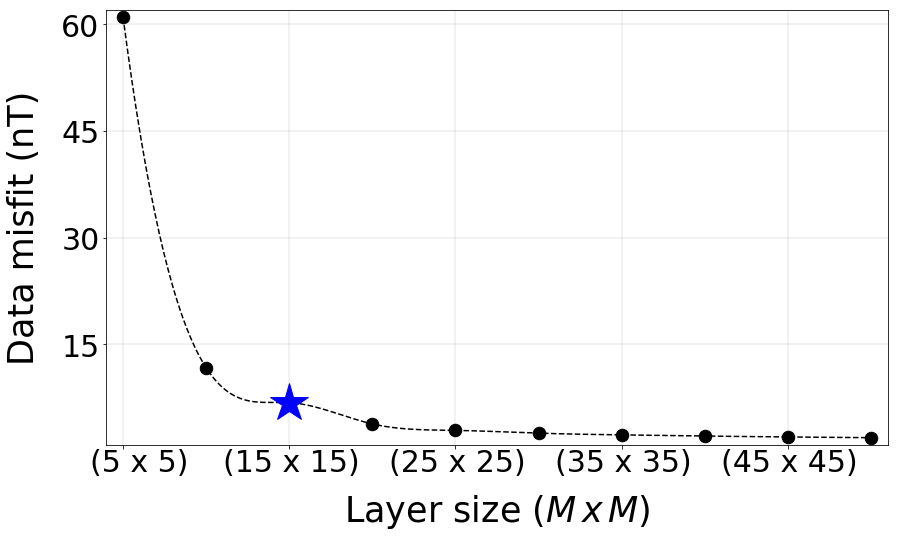

In [121]:
# Plot the figure
pyplot.figure(figsize=(14, 8))
pyplot.plot(shapes, diff, 'k.', linewidth = 2., markersize = 25)
pyplot.plot(S, E, 'k--')
pyplot.plot(shapes[2], diff[2], 'b*', markersize = 40., label = 'Ideal number of sources')

xaxes =pyplot.gca()
xaxes.axes.get_xaxis().set_ticklabels([])
#xaxes.axes.get_yaxis().set_ticklabels([])
pyplot.text(3., -2.75, '(5 x 5)', fontsize = 30)
pyplot.text(11., -2.75, '(15 x 15)', fontsize = 30)
pyplot.text(21., -2.75, '(25 x 25)', fontsize = 30)
pyplot.text(31., -2.75, '(35 x 35)', fontsize = 30)
pyplot.text(41., -2.75, '(45 x 45)', fontsize = 30)

pyplot.xlabel('Layer size $(M \, x \, M)$', fontsize = 35, labelpad = 40)
pyplot.ylabel('Data misfit (nT)', fontsize = 35, labelpad = 20)
pyplot.xticks(numpy.arange(shapes.min(), shapes.max(), 10), fontsize = 20)
pyplot.yticks(numpy.linspace(0., 60., 5), fontsize = 30)
pyplot.xlim(shapes.min() - 1., shapes.max() + 1.)
pyplot.ylim(diff.min() - 1., diff.max() + 1.)
pyplot.grid(linewidth = 0.1, color = 'k')
#pyplot.legend(loc = 'upper right', fontsize = 'xx-large')

pyplot.savefig('layer-fig01-r1.png', dpi = 300, transparent = True, bbox_inches = 'tight')
pyplot.savefig('layer-fig01-r1.pdf', dpi = 300, transparent = True, bbox_inches = 'tight')
pyplot.show()

In [122]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection

In [123]:
area_layer = area#(-4500., 4500., -4500., 4500.)
shape_layer = (15, 15)
level = 0.5*(dike2[5] + dike2[4])

In [124]:
xlayer, ylayer, zlayer = grids.regular_grid(area, shape_layer, level)

In [125]:
EQL = equivalentlayer.layer(area_layer, shape_layer, level)

In [126]:
vec, fitted = equivalentlayer.fit_layer_mag(data, shape, EQL, shape_layer, 2.e-8, incf, decf, incs, decs)

In [127]:
residual = tf - fitted
vminr = residual.min()
vmaxr = residual.max()

In [128]:
xp = xo*0.001
yp = yo*0.001
zp = zo*0.001

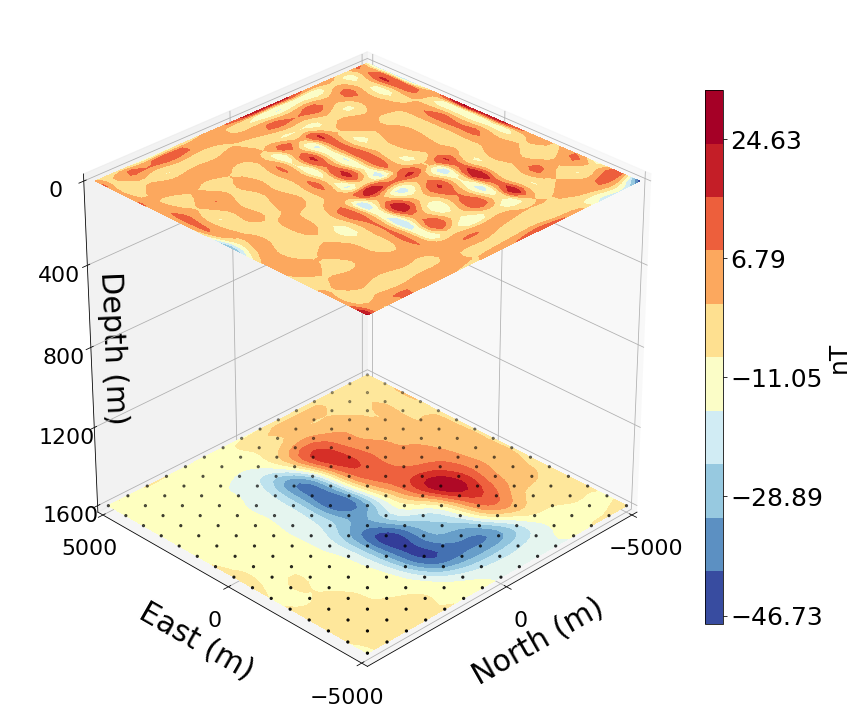

In [129]:
figure = pyplot.figure(figsize=(12, 10))
ax = figure.gca(projection = '3d')

p1 = ax.contourf(xo.reshape(shape), yo.reshape(shape), residual.reshape(shape), 10, zdir='z', offset = 0., 
                 cmap = 'RdYlBu_r', vmin = vminr, vmax = vmaxr)
cbar1 = pyplot.colorbar(p1, aspect = 30, fraction = 0.025, orientation = 'vertical', pad = 0.)
cbar1.set_label('nT', fontsize = 25, rotation = 90.)
cbar1.set_ticks(numpy.linspace(vminr, vmaxr, 5))
cbar1.set_clim(vminr, vmaxr)
cbar1.ax.tick_params(labelsize = 25)

p2 = ax.contourf(xo.reshape(shape), yo.reshape(shape), fitted.reshape(shape), 15, zdir='z', offset = level, 
                 cmap = 'RdYlBu_r', vmin = numpy.min(fitted), vmax = numpy.max(fitted))
ax.scatter3D(xlayer.reshape(shape_layer), ylayer.reshape(shape_layer), zlayer.reshape(shape_layer), 
             s = 5., c = 'k')
#cbar2 = pyplot.colorbar(p2, aspect = 30, fraction = 0.025, orientation = 'horizontal', pad = 0.05)
#cbar2.set_label('Predicted data (nT)', fontsize = 25, rotation = 0.)
#cbar2.set_ticks(numpy.linspace(fitted.min(), fitted.max(), 5))
#cbar2.ax.tick_params(labelsize = 20)

x_scale = 1.
y_scale = 1.
z_scale = 1.
scale=numpy.diag([x_scale, y_scale, z_scale, 1.0])
scale=scale*(1.0/scale.max())
scale[3,3] = 1.
def short_proj():
    return numpy.dot(Axes3D.get_proj(ax), scale)
ax.get_proj=short_proj
ax.set_xlabel('North (m)', size = 30, labelpad = 20)
ax.set_ylabel('East (m)', size = 30, labelpad = 20)
ax.set_zlabel('Depth (m)', size = 30, labelpad = -35)
ax.set_xlim(xo.min(), xo.max())
ax.set_xticks(numpy.arange(xo.min(), xo.max(), 5000))
ax.set_yticks(numpy.linspace(yo.min(), yo.max(), 3))
ax.set_zticks(numpy.linspace(0., level, 5))
ax.set_ylim(yo.min(), yo.max())
ax.set_zlim(0., level)
ax.tick_params(labelsize = 22, pad = 10)
ax.view_init(210, 135)
pyplot.tight_layout(True)

pyplot.savefig('layer-fig02-r1.png', dpi = 300, transparent = True, bbox_inches = 'tight')
pyplot.savefig('layer-fig02-r1.pdf', dpi = 300, transparent = True, bbox_inches = 'tight')
pyplot.show()